In [1]:
from sklearn.linear_model import ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from Importer import *
import Processor
from numpy.polynomial.polynomial import Polynomial
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

importlib.reload(Processor)

<module 'Processor' from 'C:\\Users\\venablecrofta\\OneDrive - Virginia Tech\\Documents\\GitHub\\ME_5984-Final-Project\\Processor.py'>

In [2]:
path =  r"train_FD001.csv"
test_path =  r"test_FD001.csv"

index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)


df_train_RUL = df_train.groupby(['id']).agg({'cycles':'max'})
df_train_RUL.rename(columns={'cycles':'life'},inplace=True)
df_train_RUL.head()
df_train=df_train.merge(df_train_RUL,how='left',on=['id'])

df_train['RUL']=df_train['life']-df_train['cycles']
df_train.drop(['life'],axis=1,inplace=True)
df_train.head()

,id,cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [3]:
df_test_RUL = pd.read_csv('RUL_FD001.csv',header=None, delimiter =r"\s+")
print(df_test_RUL)

      0
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]


In [4]:
columns_to_drop = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_9','s_10', 's_16', 's_18', 's_19']
df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [5]:
scaler = MinMaxScaler()
df_test_cycle = df_test.groupby(['id']).agg({'cycles':'max'})
df_test_cycle.rename(columns={'cycles':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['id'])
df_test_max = df_test_max[(df_test_max['cycles']==df_test_max['life'])]
# df_test_max['RUL'] = df_test_max['life']-df_test_max['cycles']
df_test_max.drop(['life'],axis=1,inplace=True)

In [6]:
feature_names = [col for col in df_train.columns if col.startswith('s') or col.startswith('sensor')]

X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]

In [7]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:

def relative_error(vector1, vector2):
    vector1 = np.array(vector1)
    return np.mean(np.abs(vector1 - vector2) / np.abs(vector1))

def percentage_error(y_true, y_pred):
    return relative_error(y_true, y_pred) * 100

def mse(vector1, vector2):
    return np.mean((np.array(vector1) - np.array(vector2))**2)

def mpe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_pred - y_true) / np.abs(y_true)) * 100

In [9]:
model = KNeighborsRegressor(n_neighbors=9)
model.fit(X_train,y_train)
y_predictions = model.predict(X_test)

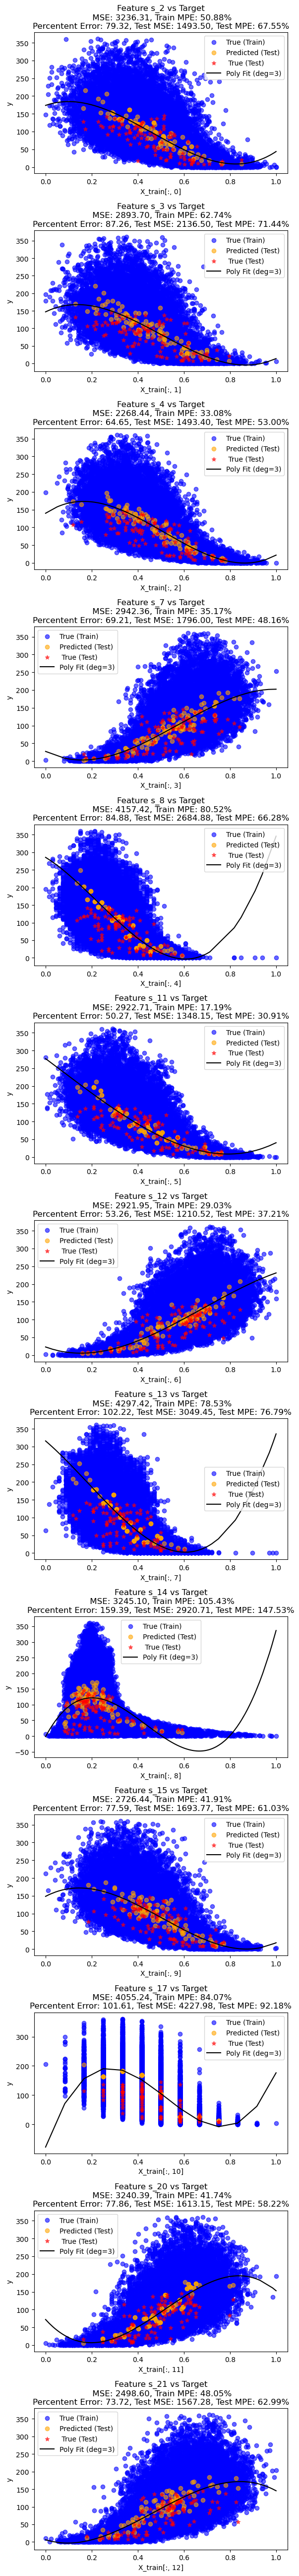

In [10]:
n_features = X_train.shape[1]
fig, axes = plt.subplots(n_features, 1, figsize=(6, 4 * n_features))
feature_names = [col for col in df_train.columns if col.startswith('s') or col.startswith('sensor')]

if n_features == 1:
    axes = [axes]  # Ensure that axes is always an iterable
def mpe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    non_zero_indices = np.abs(y_true) > 0 #avoid dividing by 0
    if np.any(~non_zero_indices):
#         print(f"Warning: Zero values detected in y_true for MPE calculation.")
        continue
    return np.mean(((y_pred[non_zero_indices] - y_true[non_zero_indices]) / np.abs(y_true[non_zero_indices])) * 100)

for i, ax in enumerate(axes):
    # Get predictions for the current feature
    x_train_feature = X_train[:, i].reshape(-1, 1)  
    x_test_feature = X_test[:, i].reshape(-1, 1)    
    
    # Fit the model on the current feature
    model_feature = KNeighborsRegressor(n_neighbors=9)
    model_feature.fit(x_train_feature, y_train)
    
    y_pred_train_feature = model_feature.predict(x_train_feature)
    y_pred_test_feature = model_feature.predict(x_test_feature)
    
    ax.scatter(X_train[:, i], y_train, label='True (Train)', alpha=0.6, color='blue')
    ax.scatter(x_test_feature, y_pred_test_feature, label='Predicted (Test)', alpha=0.6, color='orange')
    ax.scatter(x_test_feature, y_test, label =' True (Test)', alpha = 0.6, color = 'red', marker = '*')


    degree = 3
    sorted_idx = np.argsort(X_train[:, i])
    x_sorted = X_train[:, i][sorted_idx]
    y_sorted = y_pred_train_feature[sorted_idx]
    
    poly_model = np.poly1d(np.polyfit(x_sorted, y_sorted, deg=degree))
    y_smooth = poly_model(x_sorted)

    ax.plot(x_sorted, y_smooth, color='black', label=f'Poly Fit (deg={degree})')


    
    feature_mse_train = mse(y_train, y_pred_train_feature)
    feature_mpe_train = mpe(y_train, y_pred_train_feature)
    feature_rmse_train = np.sqrt(feature_mse_train)
    

    feature_pe_test = percentage_error(y_test, y_pred_test_feature)
    feature_mse_test = mse(y_test, y_pred_test_feature)
    feature_mpe_test = mpe(y_test, y_pred_test_feature)
    feature_rmse_test = np.sqrt(feature_mse_test)

    ax.set_title(f'Feature {feature_names[i]} vs Target\n MSE: {feature_mse_train:.2f}, Train MPE: {feature_mpe_train:.2f}%\n'
                 f'Percentent Error: {feature_pe_test:.2f}, Test MSE: {feature_mse_test:.2f}, Test MPE: {feature_mpe_test:.2f}%')
    ax.set_xlabel(f'X_train[:, {i}]')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

In [11]:
r2 = r2_score(y_test, y_predictions)
rmse = mean_squared_error(y_test, y_predictions, squared=False)
percent_err = percentage_error(y_test, y_predictions)
mpe_val = mpe(y_test, y_predictions)
mse_val = mse(y_test, y_predictions)
print(f"R² Score                : {r2:.4f}")
print(f"Mean Squared Error      : {mse_val:.4f}")
print(f"Percentage Error        : {percent_err:.2f}%")
print(f"Mean Percentage Error   : {mpe_val:.2f}%")

R² Score                : 0.3609
Mean Squared Error     : 1103.6895
Percentage Error        : 40.93%
Mean Percentage Error   : 35.51%


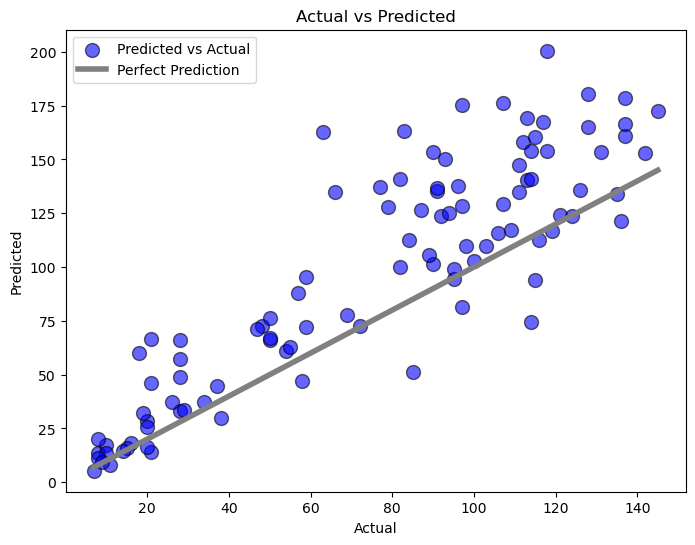

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for actual vs predicted
ax.scatter(y_test, y_predictions, s=100, alpha=0.6, color='blue', edgecolor='black', label='Predicted vs Actual')

# Line representing perfect prediction (45-degree line)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linewidth=4, label='Perfect Prediction')

# Display the legend
ax.legend()

plt.show()